# Project Title: Diabetes Prediction [notebook 'Additional_Data_Processing']

### Authors: Denys Herasymuk & Yaroslav Morozevych

In [1]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from utils import scale_normalize

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Inspect Dataset

In [16]:
df = pd.read_csv('./data/diabetes_dataset__2019.csv')

In [3]:
df.head(10)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
5,40-49,Male,no,yes,none,21.0,no,yes,10,10,no,occasionally,sometimes,high,0.0,0,not much,yes
6,less than 40,Male,no,no,one hr or more,24.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
7,less than 40,Male,no,no,less than half an hr,20.0,no,no,7,7,yes,occasionally,sometimes,low,0.0,0,not much,no
8,40-49,Male,yes,no,one hr or more,23.0,no,no,7,7,no,occasionally,sometimes,normal,0.0,0,not much,no
9,less than 40,Male,no,no,more than half an hr,20.0,no,no,8,8,o,occasionally,sometimes,normal,0.0,0,not much,no


## Feature Engineering for Categorical Data

In [17]:
df["Age"] = df["Age"].map({"less than 40": 0, "40-49": 1, "50-59": 2, "60 or older": 3})
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Family_Diabetes"] = df["Family_Diabetes"].map({"no": 0, "yes": 1})
df["highBP"] = df["highBP"].map({"no": 0, "yes": 1})
df["PhysicallyActive"] = df["PhysicallyActive"].map({"none": 0, "less than half an hr": 1, "more than half an hr": 2, "one hr or more": 3})
df["Smoking"] = df["Smoking"].map({"no": 0, "yes": 1})
df["Alcohol"] = df["Alcohol"].map({"no": 0, "yes": 1})
df["RegularMedicine"] = df["RegularMedicine"].map({"no": 0, "yes": 1})
df["JunkFood"] = df["JunkFood"].map({"occasionally": 0, "often": 1, "very often": 2, "always": 3})
df["Stress"] = df["Stress"].map({"not at all": 0, "sometimes": 1, "very often": 2, "always": 3})
df["BPLevel"] = df["BPLevel"].map({"normal": 0, "high": 1, "High": 1, "low": 2, "Low": 2})
df["UriationFreq"] = df["UriationFreq"].map({"not much": 0, "quite often": 1})
df["Diabetic"] = df["Diabetic"].map({"no": 0, "yes": 1})

In [18]:
df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,2,1,0,1,3,39.0,0,0,8,6,0.0,0,1,1.0,0.0,0,0,0.0
1,2,1,0,1,1,28.0,0,0,8,6,1.0,2,1,0.0,0.0,0,0,0.0
2,1,1,0,0,3,24.0,0,0,6,6,0.0,0,1,0.0,0.0,0,0,0.0
3,2,1,0,0,3,23.0,0,0,8,6,0.0,0,1,0.0,0.0,0,0,0.0
4,1,1,0,0,1,27.0,0,0,8,8,0.0,0,1,0.0,0.0,0,0,0.0


## Get Rid of Nulls

In [20]:
df.isnull().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      1
JunkFood             0
Stress               0
BPLevel              1
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             2
dtype: int64

In [21]:
df = df.dropna(how='any',axis=0)

In [22]:
df.isnull().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64

In [23]:
df = df.loc[(df['BMI'] > 0)]

## Correlation Matrix

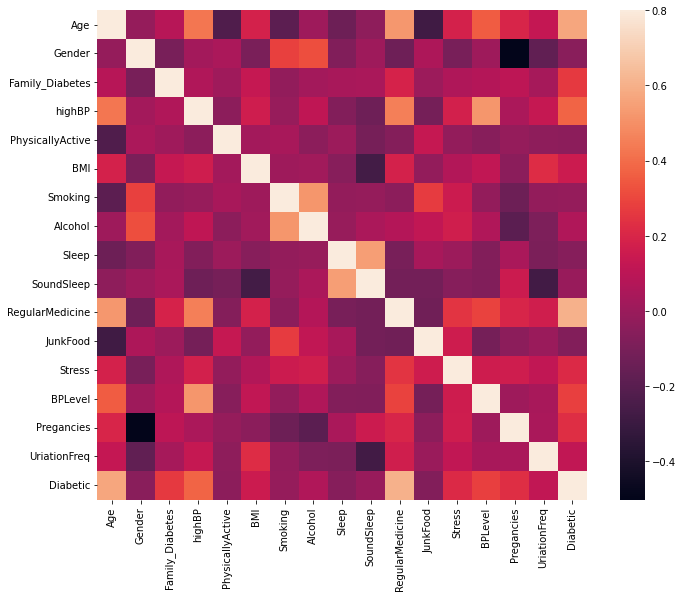

In [24]:
# Correlation matrix
corrmat = df.corr()

# Plot the heatmap of a correlation matrix
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [25]:
print(corrmat)

                       Age    Gender  Family_Diabetes    highBP  \
Age               1.000000 -0.014494         0.083556  0.425041   
Gender           -0.014494  1.000000        -0.104394  0.021506   
Family_Diabetes   0.083556 -0.104394         1.000000  0.066609   
highBP            0.425041  0.021506         0.066609  1.000000   
PhysicallyActive -0.228936  0.047093         0.012637 -0.043348   
BMI               0.184237 -0.097576         0.129306  0.160019   
Smoking          -0.189571  0.285178        -0.026769 -0.013940   
Alcohol           0.011020  0.320743         0.023164  0.112241   
Sleep            -0.137459 -0.076585         0.039976 -0.072851   
SoundSleep       -0.036088  0.007439         0.042782 -0.133900   
RegularMedicine   0.522221 -0.135986         0.184887  0.450737   
JunkFood         -0.283907  0.057021         0.003347 -0.115015   
Stress            0.179356 -0.105223         0.060459  0.177600   
BPLevel           0.357186  0.009278         0.074175  0.51502

As we can see, the features that have some positive correlation to having diabetes are:
- Age
- Family_Diabetes
- highBP
- BMI
- RegularMedicine
- Stress
- BPLevel
- Pregancies
- Diabetic

## Feature Selection Using Random Forest

In [26]:
# Choose the most relevant features based on data analysis above.
features = ["Age", "Family_Diabetes", "highBP", "BMI", "RegularMedicine", "Stress", "BPLevel", "Pregancies", "Diabetic"]
scaled_df = scale_normalize(df=df, features=features)

# Separate the dataframe onto features and target.
features_df = scaled_df.drop("Diabetic", axis="columns")
target_df = df[['Diabetic']]

# Split the dataset.
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=25)

In [28]:
NUM_ESTIMATORS = 200

# Do the model fitting and feature selection altogether.
sel = SelectFromModel(RandomForestClassifier(n_estimators=NUM_ESTIMATORS))
sel.fit(X_train, y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(n_estimators=200))

In [29]:
# See which features are important.
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['Age', 'BMI', 'RegularMedicine'], dtype='object')


### Conclusion
As we can see by the results of RF Classifier, the most important features in this dataset are:
- Age
- BMI
- RegularMedicine

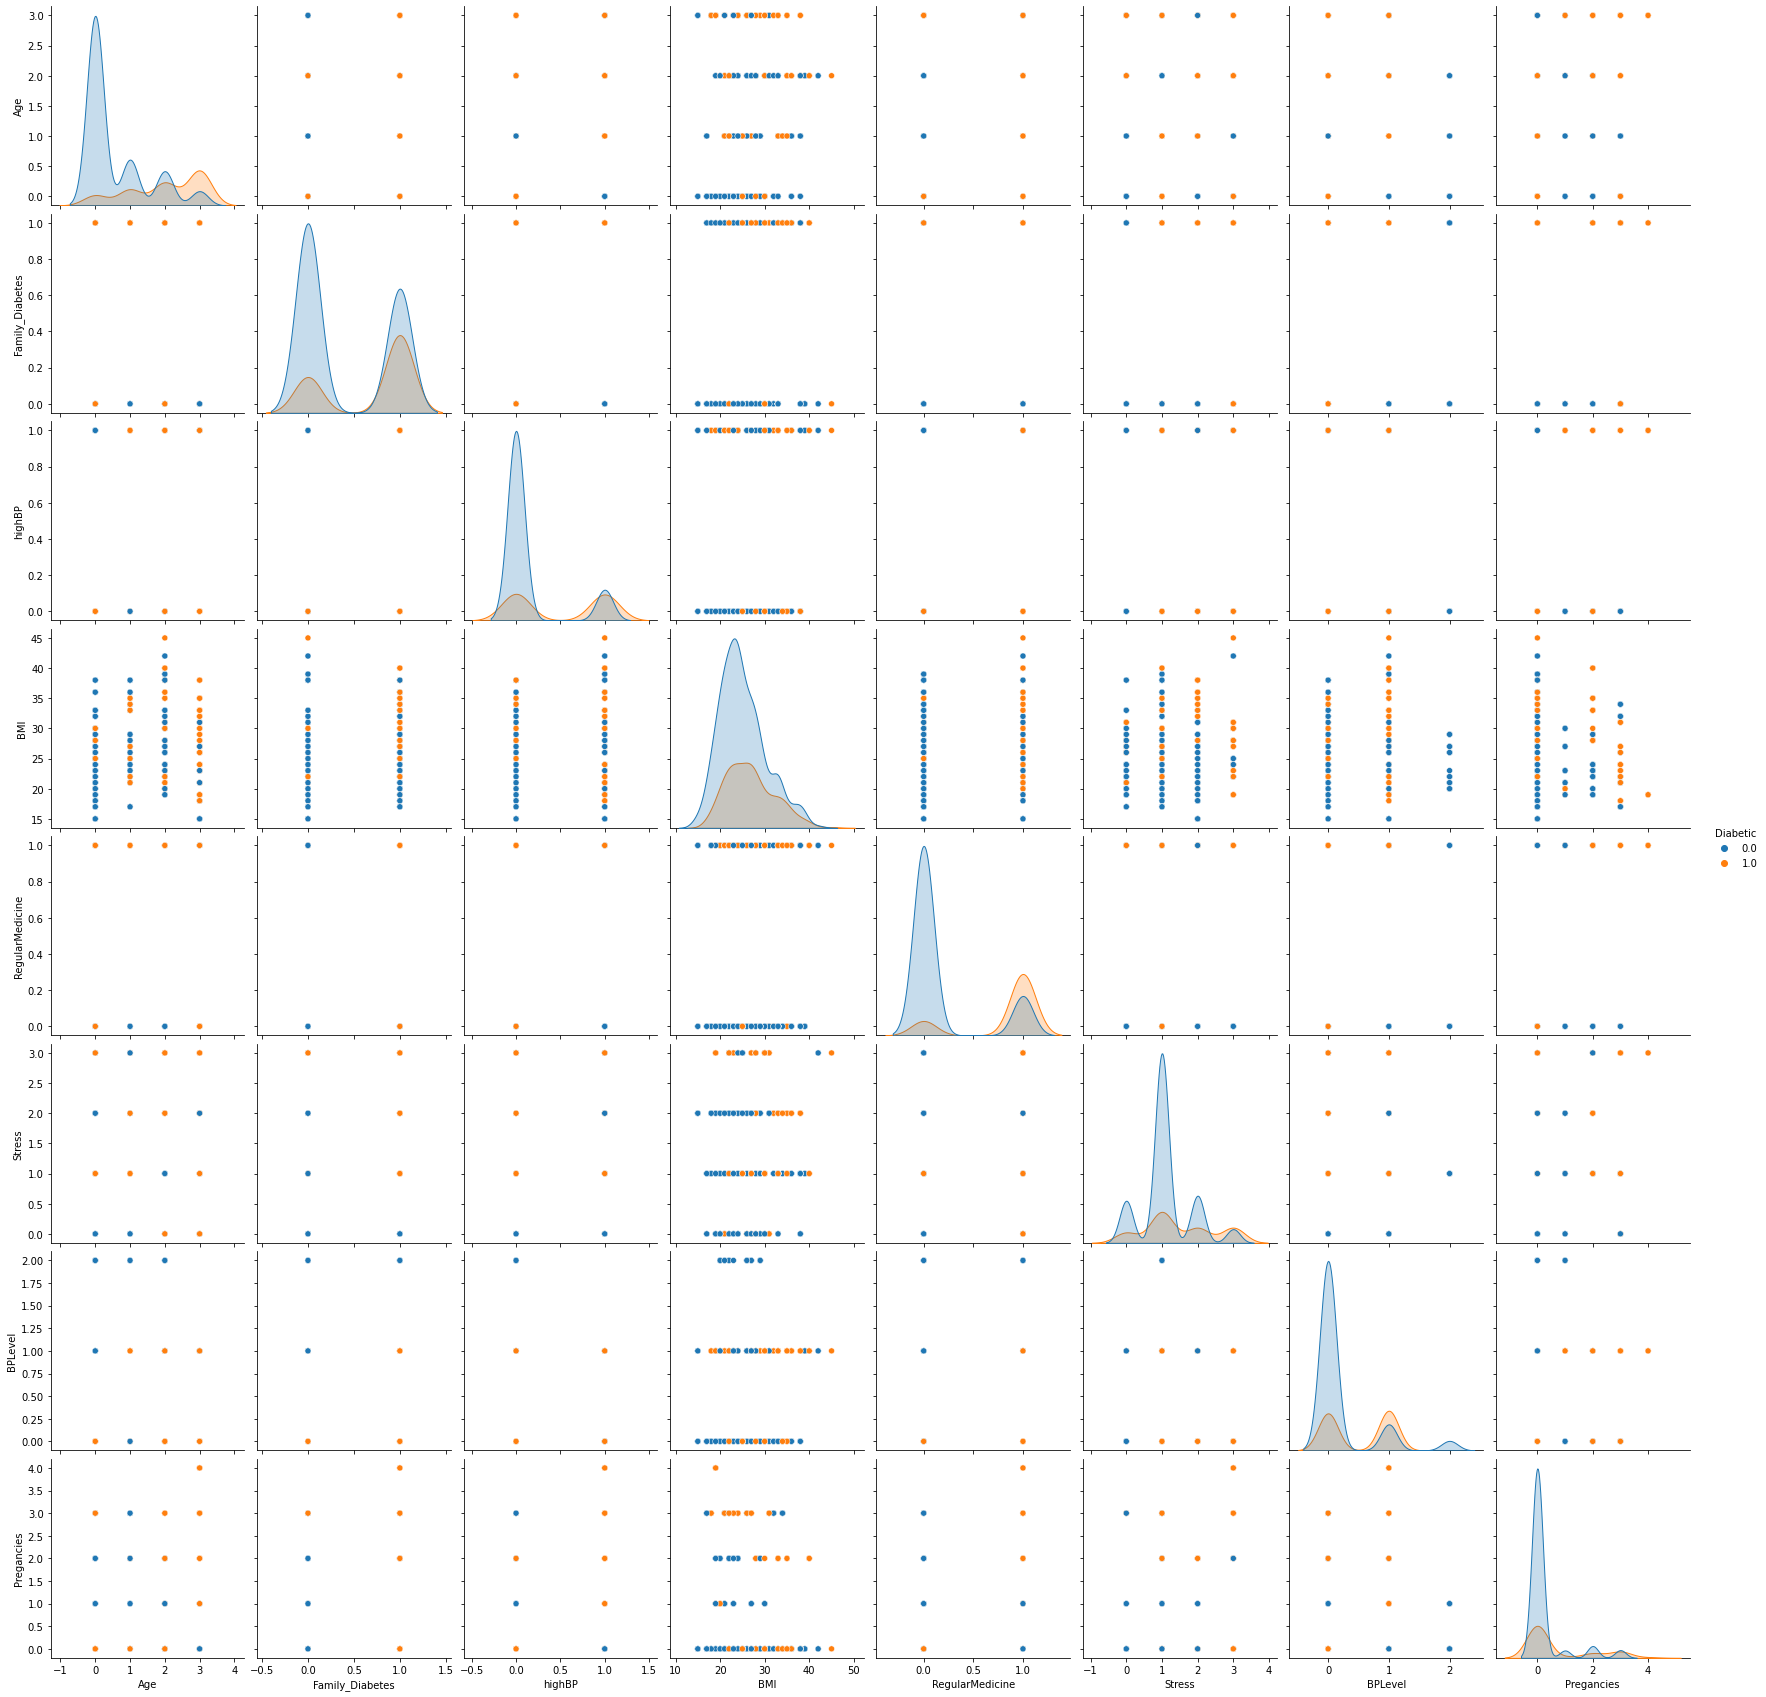

In [31]:
# Include only the columns that have sufficient correlation with the 'Outcome'.
cols = ["Age", "Family_Diabetes", "highBP", "BMI", "RegularMedicine", "Stress", "BPLevel", "Pregancies", "Diabetic"]
# Plot the relationship between all features using 'Outcome' as a visual metric.
sns.pairplot(df[cols], height=3.0, hue="Diabetic")

## Save Data

In [32]:
df.to_csv("./data/diabetes_2019_processed.csv", sep=",", columns=cols, float_format="%.3f")